In [20]:
import requests
from pprint import pprint
import pandas as pd
from tqdm import tqdm
import numpy as np

from tqdm import tqdm
from tqdm.auto import tqdm

tqdm.pandas()

TOKEN = "APPLRL69Q885BK61DVUQNLOJ372UAFBK0SSB7IE057EIVUKS2LBFQADC03NCQVRV"

/Users/ana_cher/.conda/envs/phd38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Загрузка данных с hh

In [2]:
op_bac = pd.read_excel("op_bac_2024.xlsx")
op_mas = pd.read_excel("op_mas_2024.xlsx")

display(op_bac.sample(2))
display(op_mas.sample(2))

,#,ОП,Профессии
1,2.0,КОМПЬЮТЕРНЫЕ ТЕХНОЛОГИИ: ПРОГРАММИРОВАНИЕ И ИС...,профессии не указаны
5,6.0,МОБИЛЬНЫЕ И СЕТЕВЫЕ ТЕХНОЛОГИИ,"мобильный разработчик, Web-разработчик, fronte..."


,#,ОП,Профессии
12,13,НЕЙРОТЕХНОЛОГИИ И ПРОГРАММНАЯ ИНЖЕНЕРИЯ,"программист-разработчик, веб-программист, DevO..."
10,11,ИНСТРУМЕНТЫ РАЗРАБОТКИ И АНАЛИЗА ПРОГРАММ,"Разработчик IDE , Архитектор IDE Разработчик к..."


In [9]:
op_bac["jobs"] = op_bac["Профессии"].apply(lambda row: [x.strip().lower() for x in row.split(",")] if row not in ("профессии не указаны", "професси не указаны") else np.nan)
display(op_bac.head(2))

op_mas["jobs"] = op_mas["Профессии"].apply(lambda row: [x.strip().lower() for x in row.split(",")] if row not in ("профессии не указаны", "професси не указаны") else np.nan)
display(op_mas.head(2))

,#,ОП,Профессии,jobs
0,1.0,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,"Prompt-инженер, AI-тренер, ML-инженер, Аналити...","[prompt-инженер, ai-тренер, ml-инженер, аналит..."
1,2.0,КОМПЬЮТЕРНЫЕ ТЕХНОЛОГИИ: ПРОГРАММИРОВАНИЕ И ИС...,профессии не указаны,NaN


,#,ОП,Профессии,jobs
0,1,"БИОИНФОРМАТИКА И СИСТЕМНАЯ БИОЛОГИЯ, BIOINFORM...",професси не указаны,NaN
1,2,МАТЕМАТИЧЕСКОЕ И КОМПЬЮТЕРНОЕ МОДЕЛИРОВАНИЕ,"программистом-математиком, Science Programmer,...","[программистом-математиком, science programmer..."


In [10]:
valid_bac = op_bac.dropna()
valid_mas = op_mas.dropna()

print(valid_bac.shape, valid_mas.shape)

(15, 4) (58, 4)


In [11]:
TITLE = "РУКОВОДИТЕЛЬ IT-РАЗРАБОТКИ"


def get_vacancies_idx(page, title):

    params = {"page": page, "per_page": 100,
            "text": title,
            "clusters": True, }

    url = 'https://api.hh.ru/vacancies'
    headers = {'Authorization': f'Bearer {TOKEN}'}
    response = requests.get(url, headers=headers, params=params)

    res = response.json()["items"]
    return [[x["id"], x["name"]] for x in res] 


# vacs = get_vacancies_idx(1, TITLE)

In [14]:
cols = ["vac_id", "vac_title", "op", "job"]
df_vac_bac = pd.DataFrame(columns=cols)

# bac
for i in valid_bac.index.values:
    op = valid_bac["ОП"][i]
    job_list = valid_bac["jobs"][i]
    for job in tqdm(job_list):
        for i in range(0,20):
            try:
                vacs = get_vacancies_idx(i, job)
                cur_res = pd.DataFrame(vacs, columns=["vac_id", "vac_title"])
                cur_res["op"] = op
                cur_res["job"] = job
                df_vac_bac = pd.concat([df_vac_bac, cur_res])
            except KeyError:
                pass
    print(i, df_vac_bac.shape)

100%|██████████| 11/11 [01:16<00:00,  6.97s/it]


19 (9561, 4)


100%|██████████| 10/10 [01:15<00:00,  7.58s/it]


19 (17863, 4)


100%|██████████| 2/2 [00:23<00:00, 11.57s/it]


19 (21863, 4)


100%|██████████| 9/9 [01:30<00:00, 10.05s/it]


19 (36316, 4)


100%|██████████| 9/9 [01:18<00:00,  8.75s/it]


19 (49707, 4)


100%|██████████| 8/8 [00:51<00:00,  6.44s/it]


19 (54363, 4)


100%|██████████| 6/6 [00:54<00:00,  9.11s/it]


19 (62546, 4)


100%|██████████| 8/8 [01:05<00:00,  8.22s/it]


19 (72630, 4)


100%|██████████| 10/10 [01:17<00:00,  7.72s/it]


19 (82283, 4)


100%|██████████| 12/12 [01:47<00:00,  8.96s/it]


19 (98198, 4)


100%|██████████| 8/8 [01:10<00:00,  8.80s/it]


19 (107970, 4)


100%|██████████| 7/7 [00:41<00:00,  5.98s/it]


19 (110398, 4)


100%|██████████| 7/7 [00:32<00:00,  4.64s/it]


19 (110452, 4)


100%|██████████| 6/6 [00:37<00:00,  6.20s/it]


19 (113371, 4)


100%|██████████| 8/8 [01:08<00:00,  8.57s/it]

19 (121973, 4)


In [16]:
display(df_vac_bac)
print(df_vac_bac.vac_id.nunique())

,vac_id,vac_title,op,job
0,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер
1,96700997,Prompt Engineer/Промпт Инженер,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер
2,96617917,LLM Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер
3,95458486,Prompt-инженер (MTS AI),ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер
4,97133775,Prompt Engineer GigaChat,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер
...,...,...,...,...
30,93358833,Fullstack QA Engineer,БИОТЕХНОЛОГИЯ,специалист по валидации производства
31,93360140,QA Engineer,БИОТЕХНОЛОГИЯ,специалист по валидации производства
32,95167946,Технолог Цеха/химик,БИОТЕХНОЛОГИЯ,специалист по валидации производства
33,96114592,Data Science / Machine Learning Engineer,БИОТЕХНОЛОГИЯ,специалист по валидации производства


67292


In [36]:
df_vac_mas = pd.DataFrame(columns=cols)

# bac
for i in valid_mas.index.values:
    op = valid_mas["ОП"][i]
    job_list = valid_mas["jobs"][i]
    for job in tqdm(job_list):
        for j in range(0,20):
            try:
                vacs = get_vacancies_idx(j, job)
                cur_res = pd.DataFrame(vacs, columns=["vac_id", "vac_title"])
                cur_res["op"] = op
                cur_res["job"] = job
                df_vac_mas = pd.concat([df_vac_mas, cur_res])
            except KeyError:
                pass
    print(i, df_vac_mas.shape)

100%|██████████| 9/9 [01:18<00:00,  8.76s/it]


1 (7850, 4)


100%|██████████| 1/1 [00:04<00:00,  4.85s/it]


3 (7887, 4)


100%|██████████| 5/5 [00:44<00:00,  8.85s/it]


5 (12484, 4)


100%|██████████| 3/3 [00:18<00:00,  6.26s/it]


6 (13003, 4)


100%|██████████| 13/13 [01:50<00:00,  8.50s/it]


7 (22289, 4)


100%|██████████| 10/10 [01:42<00:00, 10.23s/it]


8 (31941, 4)


100%|██████████| 3/3 [00:33<00:00, 11.26s/it]


9 (36008, 4)


100%|██████████| 8/8 [01:14<00:00,  9.29s/it]


10 (41167, 4)


100%|██████████| 6/6 [00:37<00:00,  6.19s/it]


11 (42525, 4)


100%|██████████| 9/9 [01:48<00:00, 12.07s/it]


12 (56532, 4)


100%|██████████| 8/8 [01:29<00:00, 11.16s/it]


13 (66023, 4)


100%|██████████| 1/1 [00:10<00:00, 10.49s/it]


15 (67120, 4)


100%|██████████| 4/4 [00:48<00:00, 12.20s/it]


16 (73192, 4)


100%|██████████| 9/9 [01:29<00:00,  9.97s/it]


17 (83100, 4)


100%|██████████| 17/17 [03:30<00:00, 12.36s/it]


18 (108593, 4)


100%|██████████| 11/11 [02:00<00:00, 10.96s/it]


19 (120519, 4)


100%|██████████| 5/5 [00:36<00:00,  7.28s/it]


20 (121927, 4)


100%|██████████| 7/7 [00:48<00:00,  6.88s/it]


21 (123000, 4)


100%|██████████| 1/1 [00:07<00:00,  7.08s/it]


22 (123547, 4)


100%|██████████| 2/2 [00:18<00:00,  9.12s/it]


23 (125631, 4)


100%|██████████| 1/1 [00:05<00:00,  5.59s/it]


24 (125672, 4)


100%|██████████| 8/8 [01:09<00:00,  8.65s/it]


25 (131054, 4)


100%|██████████| 5/5 [00:47<00:00,  9.53s/it]


26 (135721, 4)


100%|██████████| 7/7 [00:50<00:00,  7.15s/it]


27 (138112, 4)


100%|██████████| 3/3 [00:28<00:00,  9.37s/it]


28 (140656, 4)


100%|██████████| 6/6 [00:43<00:00,  7.28s/it]


29 (143628, 4)


100%|██████████| 8/8 [00:56<00:00,  7.05s/it]


30 (145652, 4)


100%|██████████| 3/3 [00:16<00:00,  5.35s/it]


32 (145666, 4)


100%|██████████| 5/5 [00:32<00:00,  6.45s/it]


33 (145974, 4)


100%|██████████| 5/5 [00:30<00:00,  6.03s/it]


35 (145977, 4)


100%|██████████| 2/2 [00:11<00:00,  5.77s/it]


36 (146015, 4)


100%|██████████| 3/3 [00:23<00:00,  8.00s/it]


37 (147809, 4)


100%|██████████| 10/10 [01:39<00:00,  9.95s/it]


38 (158417, 4)


100%|██████████| 11/11 [01:17<00:00,  7.01s/it]


39 (160927, 4)


100%|██████████| 5/5 [00:36<00:00,  7.23s/it]


40 (163231, 4)


100%|██████████| 1/1 [00:07<00:00,  7.07s/it]


42 (163231, 4)


100%|██████████| 4/4 [00:48<00:00, 12.16s/it]


43 (169231, 4)


100%|██████████| 4/4 [00:49<00:00, 12.46s/it]


46 (174956, 4)


100%|██████████| 3/3 [00:22<00:00,  7.39s/it]


48 (175789, 4)


100%|██████████| 4/4 [00:37<00:00,  9.48s/it]


49 (179802, 4)


100%|██████████| 4/4 [00:35<00:00,  8.86s/it]


50 (181873, 4)


100%|██████████| 7/7 [00:57<00:00,  8.25s/it]


51 (186062, 4)


100%|██████████| 4/4 [00:28<00:00,  7.12s/it]


52 (187521, 4)


100%|██████████| 8/8 [00:46<00:00,  5.83s/it]


53 (188702, 4)


100%|██████████| 4/4 [00:35<00:00,  8.88s/it]


54 (191188, 4)


100%|██████████| 7/7 [01:21<00:00, 11.70s/it]


55 (200237, 4)


100%|██████████| 9/9 [01:32<00:00, 10.29s/it]


58 (210567, 4)


100%|██████████| 6/6 [00:33<00:00,  5.58s/it]


62 (210640, 4)


100%|██████████| 2/2 [00:22<00:00, 11.32s/it]


63 (213621, 4)


100%|██████████| 7/7 [01:03<00:00,  9.09s/it]


64 (219900, 4)


100%|██████████| 8/8 [01:00<00:00,  7.51s/it]


66 (223591, 4)


100%|██████████| 6/6 [00:53<00:00,  8.85s/it]


67 (228660, 4)


100%|██████████| 3/3 [00:16<00:00,  5.65s/it]


68 (228972, 4)


100%|██████████| 4/4 [00:34<00:00,  8.56s/it]


69 (232223, 4)


100%|██████████| 10/10 [01:39<00:00,  9.96s/it]


70 (242037, 4)


100%|██████████| 8/8 [01:13<00:00,  9.18s/it]


71 (249802, 4)


100%|██████████| 9/9 [01:13<00:00,  8.17s/it]


76 (255827, 4)


100%|██████████| 4/4 [00:32<00:00,  8.17s/it]

79 (258365, 4)


In [37]:
display(df_vac_mas)
print(df_vac_mas.vac_id.nunique())

,vac_id,vac_title,op,job
0,67445769,Программист-математик С++,МАТЕМАТИЧЕСКОЕ И КОМПЬЮТЕРНОЕ МОДЕЛИРОВАНИЕ,программистом-математиком
1,91972208,Разработчик C++/Математик,МАТЕМАТИЧЕСКОЕ И КОМПЬЮТЕРНОЕ МОДЕЛИРОВАНИЕ,программистом-математиком
2,97703373,Разработчик алгоритмов / физик / математик,МАТЕМАТИЧЕСКОЕ И КОМПЬЮТЕРНОЕ МОДЕЛИРОВАНИЕ,программистом-математиком
3,96209306,Математик-программист,МАТЕМАТИЧЕСКОЕ И КОМПЬЮТЕРНОЕ МОДЕЛИРОВАНИЕ,программистом-математиком
4,95129186,Инженер-программист (математик),МАТЕМАТИЧЕСКОЕ И КОМПЬЮТЕРНОЕ МОДЕЛИРОВАНИЕ,программистом-математиком
...,...,...,...,...
28,95598013,Technical Support Specialist,ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product
29,96124431,"Backend разработчик (Laravel, PHP)",ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product
30,96126290,Бизнес-аналитик Tsum Outlet,ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product
31,95535405,Field Representative in Kyrgyzstan,ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product


113361


In [24]:
def get_skills_by_id(vac_id):
    headers = {'Authorization': f'Bearer {TOKEN}'}
    url = 'https://api.hh.ru/vacancies/'
    response = requests.get(url+vac_id, headers=headers)
    res2 = response.json()
    try:
        return [x["name"] for x in res2["key_skills"]]
    except KeyError:
        return []


In [22]:
df_bac_uniq = df_vac_bac.drop_duplicates(subset=["vac_id"])
df_bac_uniq.shape

(67292, 4)

In [25]:
df_bac_uniq["skills"] = df_bac_uniq.vac_id.progress_apply(get_skills_by_id)

100%|██████████| 67292/67292 [4:26:53<00:00,  4.20it/s]  
<ipython-input-25-0f58e1356cf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bac_uniq["skills"] = df_bac_uniq.vac_id.progress_apply(get_skills_by_id)


In [26]:
df_bac_uniq

,vac_id,vac_title,op,job,skills
0,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]"
1,96700997,Prompt Engineer/Промпт Инженер,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,[]
2,96617917,LLM Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Python, SQL]"
3,95458486,Prompt-инженер (MTS AI),ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, Python]"
4,97133775,Prompt Engineer GigaChat,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,[]
...,...,...,...,...,...
21,96250675,Инженер-химик,БИОТЕХНОЛОГИЯ,специалист по валидации производства,[]
24,94259722,Инженер-технолог,БИОТЕХНОЛОГИЯ,специалист по валидации производства,"[Микросхемы, Термозвуковая микросварка, Сбороч..."
25,95449153,Инженер-прочнист,БИОТЕХНОЛОГИЯ,специалист по валидации производства,"[ЕСКД, ГОСТ]"
26,95449101,Инженер-прочнист,БИОТЕХНОЛОГИЯ,специалист по валидации производства,"[ЕСКД, ГОСТ]"


In [28]:
bac_idx = df_bac_uniq.vac_id.values
df_mas_uniq = df_vac_mas.drop_duplicates(subset=["vac_id"])
df_vac_mas.shape, df_mas_uniq.shape

((260406, 4), (113753, 4))

In [29]:
df_mas_uniq = df_mas_uniq.loc[~df_mas_uniq.vac_id.isin(bac_idx)]
df_mas_uniq.shape

(64095, 4)

In [30]:
df_mas_uniq["skills"] = df_mas_uniq.vac_id.progress_apply(get_skills_by_id)

100%|██████████| 64095/64095 [3:05:57<00:00,  5.74it/s]   


In [31]:
df_mas_uniq

,vac_id,vac_title,op,job,skills
1,67445769,Программист-математик С++,МАТЕМАТИЧЕСКОЕ И КОМПЬЮТЕРНОЕ МОДЕЛИРОВАНИЕ,программистом-математиком,"[C++, Математический анализ, Вычислительная ма..."
6,97088149,"Математик, программист Matlab",МАТЕМАТИЧЕСКОЕ И КОМПЬЮТЕРНОЕ МОДЕЛИРОВАНИЕ,программистом-математиком,"[MATLAB, Математическое моделирование]"
11,96684177,Программист-математик,МАТЕМАТИЧЕСКОЕ И КОМПЬЮТЕРНОЕ МОДЕЛИРОВАНИЕ,программистом-математиком,[]
12,95026705,Математик / Программист,МАТЕМАТИЧЕСКОЕ И КОМПЬЮТЕРНОЕ МОДЕЛИРОВАНИЕ,программистом-математиком,"[C++, MATLAB]"
13,96448254,Программист-математик,МАТЕМАТИЧЕСКОЕ И КОМПЬЮТЕРНОЕ МОДЕЛИРОВАНИЕ,программистом-математиком,[]
...,...,...,...,...,...
95,96601781,Assistant Event Manager,ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product,[]
99,96434848,International sales,ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product,"[Холодные продажи, Традиционная розница, Актив..."
5,92237016,Sales Manager (Novosibirsk),ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product,"[Английский язык, Customer Service, Sales Plan..."
9,95613910,Инженер технической поддержки PDU/KVM / Techni...,ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product,"[Английский язык, Техническое обслуживание, Де..."


In [34]:
df_vac_bac = pd.merge(df_vac_bac, df_bac_uniq, left_on="vac_id", right_on="vac_id")
df_vac_mas = pd.merge(df_vac_mas, df_mas_uniq, left_on="vac_id", right_on="vac_id")

In [40]:
df_vac_bac.shape, df_vac_mas.shape

((121973, 12), (258365, 4))

In [41]:
df_mas = pd.merge(df_vac_mas, df_mas_uniq, left_on="vac_id", right_on="vac_id", how="left")
df_mas.shape

(258365, 8)

In [45]:
df_bac = df_vac_bac.copy()

In [51]:
df_bac

,vac_id,vac_title_x,op_x,job_x,vac_title_y,op_y,job_y,skills_x,vac_title,op,job,skills_y
0,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]",Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]"
1,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,mobile-разработчик,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]",Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]"
2,94598651,Content Manager/Prompt Engineer,ТЕХНОЛОГИИ РАЗРАБОТКИ КОМПЬЮТЕРНЫХ ИГР,ai developer,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]",Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]"
3,94598651,Content Manager/Prompt Engineer,ТЕХНОЛОГИИ РАЗРАБОТКИ КОМПЬЮТЕРНЫХ ИГР,engine developer,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]",Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]"
4,96700997,Prompt Engineer/Промпт Инженер,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,Prompt Engineer/Промпт Инженер,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,[],Prompt Engineer/Промпт Инженер,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
121968,96250675,Инженер-химик,БИОТЕХНОЛОГИЯ,специалист по валидации производства,Инженер-химик,БИОТЕХНОЛОГИЯ,специалист по валидации производства,[],Инженер-химик,БИОТЕХНОЛОГИЯ,специалист по валидации производства,[]
121969,94259722,Инженер-технолог,БИОТЕХНОЛОГИЯ,специалист по валидации производства,Инженер-технолог,БИОТЕХНОЛОГИЯ,специалист по валидации производства,"[Микросхемы, Термозвуковая микросварка, Сбороч...",Инженер-технолог,БИОТЕХНОЛОГИЯ,специалист по валидации производства,"[Микросхемы, Термозвуковая микросварка, Сбороч..."
121970,95449153,Инженер-прочнист,БИОТЕХНОЛОГИЯ,специалист по валидации производства,Инженер-прочнист,БИОТЕХНОЛОГИЯ,специалист по валидации производства,"[ЕСКД, ГОСТ]",Инженер-прочнист,БИОТЕХНОЛОГИЯ,специалист по валидации производства,"[ЕСКД, ГОСТ]"
121971,95449101,Инженер-прочнист,БИОТЕХНОЛОГИЯ,специалист по валидации производства,Инженер-прочнист,БИОТЕХНОЛОГИЯ,специалист по валидации производства,"[ЕСКД, ГОСТ]",Инженер-прочнист,БИОТЕХНОЛОГИЯ,специалист по валидации производства,"[ЕСКД, ГОСТ]"


In [52]:
df_bac.drop(columns=["vac_title_x",	"op_x",	"job_x", "vac_title_y",	"op_y",	"job_y", "skills_x"], inplace=True)
df_bac.rename(columns={"skills_y": "skills"}, inplace=True)
df_bac

,vac_id,vac_title,op,job,skills
0,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]"
1,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]"
2,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]"
3,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]"
4,96700997,Prompt Engineer/Промпт Инженер,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,[]
...,...,...,...,...,...
121968,96250675,Инженер-химик,БИОТЕХНОЛОГИЯ,специалист по валидации производства,[]
121969,94259722,Инженер-технолог,БИОТЕХНОЛОГИЯ,специалист по валидации производства,"[Микросхемы, Термозвуковая микросварка, Сбороч..."
121970,95449153,Инженер-прочнист,БИОТЕХНОЛОГИЯ,специалист по валидации производства,"[ЕСКД, ГОСТ]"
121971,95449101,Инженер-прочнист,БИОТЕХНОЛОГИЯ,специалист по валидации производства,"[ЕСКД, ГОСТ]"


In [53]:
df_bac.to_excel("bachelor_vacancies.xlsx")

In [54]:
df_bac["qualification"] = "bachelor"
df_mas["qualification"] = "master"
op = pd.concat([df_bac, df_mas])
op

,vac_id,vac_title,op,job,skills,qualification
0,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]",bachelor
1,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]",bachelor
2,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]",bachelor
3,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]",bachelor
4,96700997,Prompt Engineer/Промпт Инженер,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,[],bachelor
...,...,...,...,...,...,...
258360,95598013,Technical Support Specialist,ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product,NaN,master
258361,96124431,"Backend разработчик (Laravel, PHP)",ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product,NaN,master
258362,96126290,Бизнес-аналитик Tsum Outlet,ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product,[],master
258363,95535405,Field Representative in Kyrgyzstan,ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product,[],master


In [55]:
op["skills"] = op.skills.apply(lambda x: np.nan if x == [] else x)
op

,vac_id,vac_title,op,job,skills,qualification
0,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]",bachelor
1,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]",bachelor
2,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]",bachelor
3,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]",bachelor
4,96700997,Prompt Engineer/Промпт Инженер,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,NaN,bachelor
...,...,...,...,...,...,...
258360,95598013,Technical Support Specialist,ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product,NaN,master
258361,96124431,"Backend разработчик (Laravel, PHP)",ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product,NaN,master
258362,96126290,Бизнес-аналитик Tsum Outlet,ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product,NaN,master
258363,95535405,Field Representative in Kyrgyzstan,ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product,NaN,master


In [56]:
op.dropna(subset=["skills"], inplace=True)
op.shape

(130264, 6)

In [58]:
# получаем полный список скиллов из вакансий
all_skills = set([x for nested_list in op.skills.tolist() for x in nested_list])
len(all_skills)

30086

In [64]:
vac_items = pd.DataFrame(list(all_skills), columns=["name"])
vac_items.to_excel("items_from_vacancies.xlsx", index=False)

# Формирование списков навыков по ОП

In [118]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Set2")
sns.set_theme("notebook")
sns.set_style("whitegrid")

In [93]:
def unnest(data):
    return [x for nested_list in data for x in nested_list]

def get_skills(data, coef_a=0, coef_b=0, above=False, below=False):
    if above:
        return [item[0] for item in data.items() if item[1] >= coef_a]
    elif below:
        return [item[0] for item in data.items() if item[1] <= coef_b]
    else:
        return [item[0] for item in data.items() if coef_b < item[1] < coef_a]

In [115]:
columns = ["op", "qualification", "key", "additional", "noise", "total"]
op_skills = pd.DataFrame(columns=columns)

op_groups = op.groupby(["op", "qualification"])
for gr in op_groups:
    df = gr[1].drop_duplicates(subset=["vac_id"])
    skills = unnest(df.skills.tolist())
    uniq_skills = Counter(skills)

    key_n = round(df.shape[0]*0.1)
    noise_n = round(df.shape[0]*0.01)

    key_skills = get_skills(uniq_skills, coef_a=key_n, above=True)
    noise_skills = get_skills(uniq_skills, coef_b=noise_n, below=True)
    add_skills = get_skills(uniq_skills, coef_a=key_n, coef_b=noise_n)
    
    op_skills = pd.concat([op_skills, 
                           pd.DataFrame([[df.iloc[0]["op"], df.iloc[0]["qualification"], 
                                          key_skills, add_skills, noise_skills, list(uniq_skills.keys())]], 
                                          columns=columns)])

In [116]:
op_skills

,op,qualification,key,additional,noise,total
0,"АВТОМАТИЗАЦИЯ И УПРАВЛЕНИЕ, AUTOMATION & CONTROL",master,"[Автоматизация технологических процессов, Auto...","[Английский язык, TCP/IP, C/C++, C++, Git, Lin...","[Fluent English, MAXIMO, Flow Measurements/Lev...","[Fluent English, Английский язык, MAXIMO, Flow..."
0,БЕЗОПАСНОСТЬ СИСТЕМ ИСКУССТВЕННОГО ИНТЕЛЛЕКТА,master,"[SQL, Бизнес-анализ, Разработка технических за...","[UML, REST, Моделирование бизнес процессов, Ag...","[IDEF, SOAP, GUI, XML, Системный подход, Систе...","[UML, IDEF, REST, SOAP, GUI, XML, SQL, Моделир..."
0,БИЗНЕС-ИНФОРМАТИКА,bachelor,"[Работа с большим объемом информации, Бизнес-а...","[Scrum, 1С: Предприятие, Техническая документа...","[Продвинутый пользователь ПК, Написание технич...","[Работа с большим объемом информации, Бизнес-а..."
0,БИОТЕХНОЛОГИЯ,bachelor,"[Контроль качества, Организаторские навыки]","[Активные продажи, Поиск и привлечение клиенто...","[Работа с ключевыми клиентами, Работа с локаль...","[Работа с ключевыми клиентами, Работа с локаль..."
0,БИОЭКОНОМИКА И УПРАВЛЕНИЕ РЕСУРСАМИ,master,[Химические методы анализа],"[Работа в команде, Организаторские навыки, Тел...","[PR, Анализ PR стратегии конкурентов, Коммуник...","[PR, Анализ PR стратегии конкурентов, Работа в..."
...,...,...,...,...,...,...
0,ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,master,"[Разработка нового продукта, Управление команд...","[E-Commerce, Ассортиментная матрица, Управлени...","[Стратегический менеджмент, Продуктовая страте...","[E-Commerce, Стратегический менеджмент, Ассорт..."
0,ЭКОТЕХНОЛОГИИ И УСТОЙЧИВОЕ РАЗВИТИЕ,bachelor,"[Деловое общение, Поиск и привлечение клиентов...","[Навыки презентации, Планирование продаж, Упра...","[Аренда помещений, Договоры аренды, Региональн...","[Деловое общение, Аренда помещений, Договоры а..."
0,ЭЛЕКТРОИНЖЕНЕРИЯ,master,"[Чтение электросхем, Техническое обслуживание,...","[ГОСТ, Контроль качества, Пользователь ПК, Раб...","[испытатель, инженер, проведении испытаний, сх...","[испытатель, инженер, проведении испытаний, сх..."
0,ЭНЕРГОЭФФЕКТИВНЫЕ ИНЖЕНЕРНЫЕ СИСТЕМЫ И ТЕХНОЛО...,master,"[AutoCAD, Проектирование, Разработка проектной...","[Пользователь ПК, Проектирование зданий и соор...","[Компас, светопрозрачные конструкции, вентилир...","[AutoCAD, Компас, Пользователь ПК, Проектирова..."


In [117]:
op_skills["kn"] = op_skills["key"].apply(len)
op_skills["an"] = op_skills.additional.apply(len)
op_skills["nn"] = op_skills.noise.apply(len)
op_skills["tn"] = op_skills.total.apply(len)


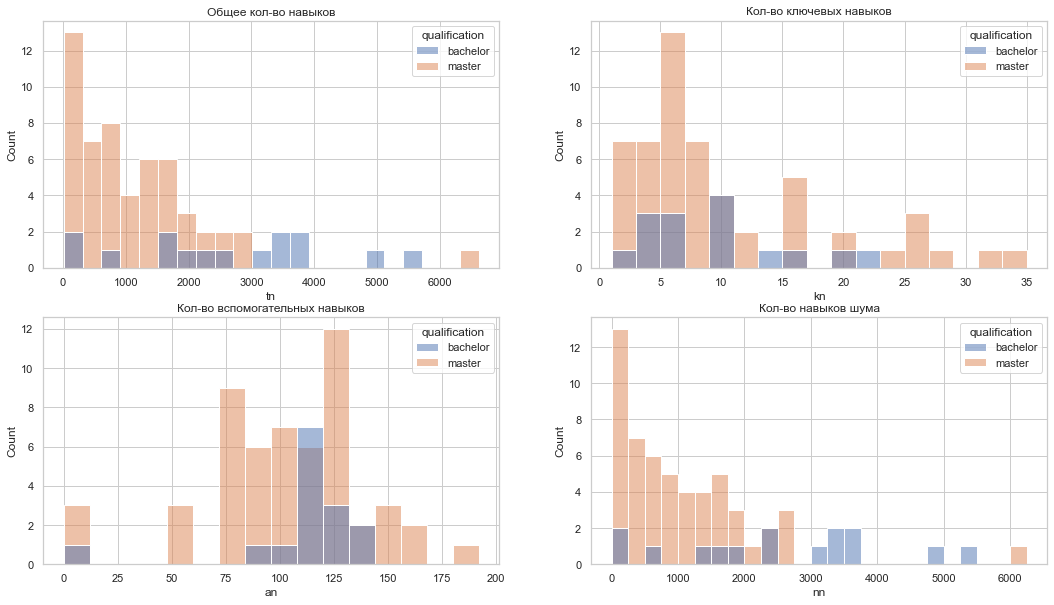

In [147]:
fig, axis = plt.subplots(2, 2, figsize=(18, 10))

axis[0][0].set_title(f"Общее кол-во навыков")
sns.histplot(ax=axis[0][0], data=op_skills.sort_values(by="qualification"), x="tn", binwidth=300, hue="qualification")

axis[0][1].set_title(f"Кол-во ключевых навыков")
sns.histplot(ax=axis[0][1], data=op_skills.sort_values(by="qualification"), x="kn", binwidth=2, hue="qualification")

axis[1][0].set_title(f"Кол-во вспомогательных навыков")
sns.histplot(ax=axis[1][0], data=op_skills.sort_values(by="qualification"), x="an", binwidth=12, hue="qualification")

axis[1][1].set_title(f"Кол-во навыков шума")
sns.histplot(ax=axis[1][1], data=op_skills.sort_values(by="qualification"), x="nn", binwidth=250, hue="qualification")

plt.show()

In [150]:
op_skills["title_lower"] = op_skills["op"].str.lower()
op_skills.sample()

,op,qualification,key,additional,noise,total,kn,an,nn,tn,title_lower
0,ТЕХНОЛОГИИ РАЗРАБОТКИ КОМПЬЮТЕРНЫХ ИГР,master,"[Git, Linux, C++, PostgreSQL, Altium Designer,...","[C/C++, Qt, Компас-3D, ООП, ГИС, С++, GIS, Pyt...","[UE5, UE4, Unreal Engine 5, Unreal Engine 4, Р...","[C/C++, UE5, UE4, Unreal Engine 5, Unreal Engi...",7,73,197,277,технологии разработки компьютерных игр


# Извлечение навыков из дисциплин

In [164]:
from ast import literal_eval
from embedding_creation import get_entities, Discipline
import json

In [153]:
df = pd.read_csv("plans_disciplines_vectorized.csv")

# данные по дисциплинам из БД
disc = pd.read_csv("disc_contents20230506_4.csv")
disc["comb_res"] = disc.comb_res.apply(literal_eval)

up = df[["up_id", "up_title", "course_id"]]
up = pd.merge(up, disc, left_on="course_id", right_on="id")

with open("up_isu_20230407.json") as f:
    js = json.load(f)

for up_isu in js.keys():
    for i in range(len(js[up_isu])):
        js[up_isu][i]["disciplines_blocks"] = json.loads(js[up_isu][i]["disciplines_blocks"])

df = pd.json_normalize(pd.DataFrame.from_dict(js)["up_isu"])
df = df[df["disciplines_blocks.block_name"] == "Блок 1. Модули (дисциплины)"]

explode_discipline_modules = df.explode("disciplines_blocks.discipline_modules")
explode_discipline_modules_norm = pd.json_normalize(explode_discipline_modules["disciplines_blocks.discipline_modules"])

attach_discipline_modules = pd.concat([explode_discipline_modules.reset_index(),
                                       explode_discipline_modules_norm.reset_index()], axis=1)
discipline_modules = attach_discipline_modules[["id", "direction_code", "edu_program_id", "edu_program_name",
                                                       "training_period", "selection_year", "module_id ", "module_name", "disciplines"]]

disciplines_explode = discipline_modules.explode("disciplines")
discipline_norm = pd.json_normalize(disciplines_explode["disciplines"])

disciplines = pd.concat([disciplines_explode.reset_index(), discipline_norm.reset_index()], axis=1)
edu_plans = disciplines[["id", "direction_code", "edu_program_id", "edu_program_name", "training_period",
                           "selection_year", "is_optional", "module_id ", "module_name", "plan_order", "dis_id", "disc_id", "discipline_name", "ze"]]

edu_plans["ze"] = edu_plans.ze.apply(lambda row: sum(filter(None, [elem["points"] for elem in row])))


df = pd.read_csv("plans_disciplines_vectorized.csv")

up = df[["up_id", "up_title", "course_id", "year", "qualification", "discipline_code"]]
up = pd.merge(up, disc, left_on="course_id", right_on="id")

valid_plans = edu_plans[["disc_id", "module_id ", "is_optional", "ze"]]
up = pd.merge(up, valid_plans, left_on="discipline_code_x", right_on="disc_id")

up.sample(3)

<ipython-input-153-8744895035e7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_plans["ze"] = edu_plans.ze.apply(lambda row: sum(filter(None, [elem["points"] for elem in row])))


,up_id,up_title,course_id,year,qualification_x,discipline_code_x,Unnamed: 0,id,discipline_code_y,title,...,extracted_entities_n,combines_res,combined_res,res_n,comb_res,comb_res_n,disc_id,module_id,is_optional,ze
1728023,7189,Мобильные и облачные технологии,20464,2022,master,21043,6411,20464,21043,Креативные технологии / Creative Technologies,...,2.0,"['Креативные технологии', 'Design thinking', '...","['Креативные технологии', 'Design thinking', '...",10,"[Сценарии развития проектов, Сценарии развития...",18,21043,4765,True,3
259181,7345,Оптико-электронные приборы и системы,2643,2020,specialist,2663,9,2643,2663,Основы кибербезопасности,...,10.0,"['Управление информационной безопасностью', 'Т...","['Управление информационной безопасностью', 'Т...",10,"[Управление информационной безопасностью, Техн...",10,2663,779,True,3
1211272,6970,Химия прикладных материалов / Chemistry of App...,4726,2020,master,3622,848,4726,3622,Прикладной искусственный интеллект (продвинуты...,...,7.0,"['Умный город', 'Умный город', 'Speech Synthes...","['Умный город', 'Умный город', 'Speech Synthes...",10,"[Умный город, Умный город, Speech Synthesis an...",12,3622,1955,True,3


In [154]:
up = up.drop_duplicates(subset=["up_id", "course_id"])
up.rename(columns={"qualification_x": "qualification"}, inplace=True)

up.qualification.value_counts()

bachelor      15692
master        13145
specialist      377
Name: qualification, dtype: int64

In [158]:
up.iloc[0]["raw_text"]  # здесь лежит текст для извлечения навыков

'Основы обработки мультимедийных данных. Дисциплина по выбору для студентов факультета инфокоммуникационных технологий. В рамках дисциплины рассматриваются вопросы обработки и анализа мультимедийных данных (изображения, звук). Особое внимание уделяется методам сжатия данных. Практическая часть курса включает в себя выполнение заданий на языке программирования Python.. Анализ мультимедийных данных. Задачи анализа изображений: OCR Выделение характеристик объекта Идентификация личности Определение перемещения объекта. Обработка оцифрованного звукового сигнала. Атрибуты звуковой волны Представление звука в цифровом формате Спектр звука Речевой сигнал. Стандарт CELP Особенности восприятия звука. Обработка оцифрованного изображения. Задачи обработки изображения: Геометрические преобразования, Цветовая и тоновая коррекция, Сравнение изображений, Комбинирование изображений, Интерполяция и сглаживание, Разделение на области, Редактирование и ретуширование, Компенсация потери резкости Методы обр

In [169]:
vac_items.reset_index().rename(columns={"index": "id"}, inplace=True)
vac_items["lowercase"] = vac_items.name.str.lower()
vac_items

,name,lowercase
0,,
1,персональные данные,персональные данные
2,Ведение групп в социальных сетях,ведение групп в социальных сетях
3,Оформление текстилем,оформление текстилем
4,Разработка новых рецептур; соблюдение технолог...,разработка новых рецептур; соблюдение технолог...
...,...,...
30081,UserGate,usergate
30082,HiSilicon,hisilicon
30083,Физик,физик
30084,Тестирование на проникновение,тестирование на проникновение


In [174]:
get_entities(up.iloc[0]["raw_text"], vac_items, 150)

TypeError: get_entities() takes from 1 to 2 positional arguments but 3 were given

In [176]:
get_entities(up.iloc[0]["raw_text"], vac_items, entities_to_match=150)

TypeError: get_entities() got multiple values for argument 'entities_to_match'

In [177]:
op

,vac_id,vac_title,op,job,skills,qualification
0,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]",bachelor
1,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]",bachelor
2,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]",bachelor
3,94598651,Content Manager/Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Английский язык, PROMT, Креативность, API, PDF]",bachelor
12,96617917,LLM Prompt Engineer,ЯЗЫКОВЫЕ МОДЕЛИ И ИСКУССТВЕННЫЙ ИНТЕЛЛЕКТ,prompt-инженер,"[Python, SQL]",bachelor
...,...,...,...,...,...,...
258348,96000800,IT Business Partner,ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product,[Проектный менеджмент],master
258349,95613910,Инженер технической поддержки PDU/KVM / Techni...,ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product,"[Английский язык, Техническое обслуживание, Де...",master
258351,95885088,SMM Manager,ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product,"[SMM, Content strategy, Crypto, Blockchain, De...",master
258358,95490628,Руководитель Отдела Продаж,ЦИФРОВЫЕ ПРОДУКТЫ: СОЗДАНИЕ И УПРАВЛЕНИЕ,head of product,"[Английский язык, Управление продажами, Прямые...",master


In [179]:
op.to_excel("skills_professions.xlsx", index=False)